### Visualize ICESat-2 ATL06 data


In [4]:
#Written by Chia Chun Liang
#This script read in .h5 files (all files need to be put into a single folder, which in this case, is data) 
#and plot them. The data folder don't need to be all .h5 files, it could mix with other file format as well
#To plot the elevation map we only need lat, lon, and h_li from the .h5 files

#### Load necessary modules for running the notebook

In [1]:
from __future__ import print_function, division
import os
import re
import numpy as np
import scipy.interpolate
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs
import cartopy as cart
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib.colors import BoundaryNorm 
from matplotlib.ticker import MaxNLocator  
from read_ICESat2_ATL06 import read_HDF5_ATL06

#### Read ATL06 HDF5 files and extract variables of interest  

In [2]:
path = "data/"
all_files = os.listdir( path )
file_lst=[each for each in all_files if each.endswith('.h5')]
IS2_atl06_mds,IS2_atl06_attrs,IS2_atl06_beams=read_HDF5_ATL06(path+file_lst[0],ATTRIBUTES=True, HISTOGRAM=False, QUALITY=True,
    VERBOSE=False)
data_points=IS2_atl06_mds['gt1r']['land_ice_segments']['h_li']
lat = IS2_atl06_mds['gt1r']['land_ice_segments']['latitude']
lon = IS2_atl06_mds['gt1r']['land_ice_segments']['longitude']
for i in range(1,len(file_lst)):
    IS2_atl06_mds,IS2_atl06_attrs,IS2_atl06_beams=read_HDF5_ATL06(path+file_lst[i],ATTRIBUTES=True, HISTOGRAM=False, QUALITY=True,
    VERBOSE=False)
    data_points=np.concatenate((data_points, IS2_atl06_mds['gt1r']['land_ice_segments']['h_li']))
    lat=np.concatenate((lat, IS2_atl06_mds['gt1r']['land_ice_segments']['latitude']))
    lon=np.concatenate((lon, IS2_atl06_mds['gt1r']['land_ice_segments']['longitude']))

#### Plot ATL06 HDF5 files  

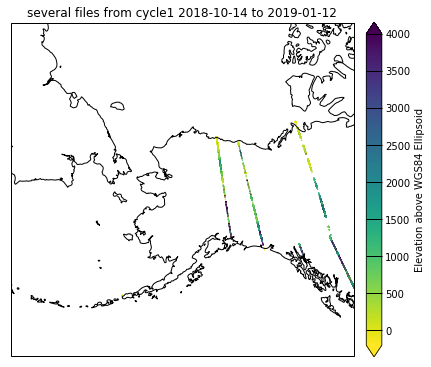

In [3]:
#-- plot elevations on a map projection
projection = ccrs.Stereographic(central_longitude=-150,
    central_latitude=70)
##num=3, this is only setting figure number
f3,ax3 = plt.subplots(num=3,figsize=(7,5),
    subplot_kw=dict(projection=projection))
#-- scatter plot parameters
vmin,vmax=(-200,4000)
cmap = cm.viridis_r
cmap.set_bad(alpha=0.0)
#-- for each beam
#for gtx in ['gt1l','gt1r','gt2l','gt2r','gt3l','gt3r']:
    #sc = ax3.scatter(Segment_Lon[gtx],Segment_Lat[gtx],
        #c=Segment_Elev[gtx], s=0.1, cmap=cmap,
        #vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())

sc = ax3.scatter(lon,lat,c=data_points, s=0.1, cmap=cmap,vmin=vmin, vmax=vmax, transform=ccrs.PlateCarree())
ax3.set_aspect('equal', adjustable='box')
ax3.get_xaxis().set_ticks([])
ax3.get_yaxis().set_ticks([]) 
ax3.set_title('several files from cycle1 2018-10-14 to 2019-01-12')
#-- add colorbar
cbar = f3.colorbar(sc,ax=ax3,extend='both',extendfrac=0.0375,
    pad=0.03, drawedges=False)
cbar.solids.set_rasterized(True)
cbar.ax.tick_params(which='both', length=16, width=1, direction='in')
cbar.ax.set_ylabel('Elevation above WGS84 Ellipsoid')
#cbar.ax.set_xlabel('m')
cbar.ax.xaxis.set_label_coords(0.50,1.04)
#-- add cartopy coastlines and zoom out
ax3.coastlines('50m')
ax3.set_extent([-180,-130,50,80],crs=ccrs.PlateCarree())
#-- adjust subplot within figure
f3.subplots_adjust(left=0.02,right=0.85,bottom=0.02,top=0.95)
#-- show the plot
plt.show()
f3.savefig("test.png")